In [7]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
weather_dataset1 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2015.csv', index_col=['datetime'], parse_dates=['datetime'], skipinitialspace=True)
weather_dataset1 = weather_dataset1[:35040]
weather_dataset2 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2016.csv', index_col=['datetime'], parse_dates=['datetime'], skipinitialspace=True)
weather_dataset3 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2017.csv', index_col=['datetime'], parse_dates=['datetime'], skipinitialspace=True)
weather_dataset = []
weather_dataset.append(weather_dataset1)
weather_dataset.append(weather_dataset2)
weather_dataset.append(weather_dataset3)
weather_dataset = pd.concat(weather_dataset)
weather_dataset

# weather_dataset = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2017.csv', index_col=['datetime'], parse_dates=['datetime'], skipinitialspace=True)
# weather_dataset = weather_dataset[:35040]

# Remove unused columms
cols_to_remove = [1,2,4,12,14,16,17,20]
weather_dataset.drop(weather_dataset.columns[[cols_to_remove]], axis=1, inplace=True)

# Reorder dataset
weather_dataset = weather_dataset[['precipMM', 'tempC', 'windspeedKmph', 'cond', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatIndexC', 'dewPointC', 'windChillC', 'windGustKmph', 'feelsLikeC']]
weather_dataset

,precipMM,tempC,windspeedKmph,cond,humidity,visibility,pressure,cloudcover,heatIndexC,dewPointC,windChillC,windGustKmph,feelsLikeC
datetime,,,,,,,,,,,,,
2015-01-01 00:00:00,0.000000,0.2000,0.295455,0.631579,0.840580,1.000000,0.758621,0.3300,0.206897,0.538462,0.2000,0.236111,0.206897
2015-01-01 00:15:00,0.000000,0.1875,0.295455,0.631579,0.840580,1.000000,0.758621,0.3250,0.206897,0.538462,0.1875,0.239583,0.206897
2015-01-01 00:30:00,0.000000,0.1750,0.295455,0.631579,0.840580,1.000000,0.758621,0.3200,0.206897,0.538462,0.1750,0.243056,0.206897
2015-01-01 00:45:00,0.000000,0.1625,0.295455,0.631579,0.840580,1.000000,0.758621,0.3150,0.206897,0.538462,0.1625,0.246528,0.206897
2015-01-01 01:00:00,0.000000,0.1500,0.295455,0.631579,0.840580,1.000000,0.758621,0.3100,0.206897,0.538462,0.1500,0.250000,0.206897
2015-01-01 01:15:00,0.000000,0.1500,0.289773,0.473684,0.840580,1.000000,0.750000,0.3075,0.198276,0.519231,0.1500,0.250000,0.198276
2015-01-01 01:30:00,0.000000,0.1500,0.284091,0.315789,0.840580,1.000000,0.741379,0.3050,0.189655,0.500000,0.1500,0.250000,0.189655
2015-01-01 01:45:00,0.000000,0.1500,0.278409,0.157895,0.840580,1.000000,0.732759,0.3025,0.181034,0.480769,0.1500,0.250000,0.181034
2015-01-01 02:00:00,0.000000,0.1500,0.272727,0.000000,0.840580,1.000000,0.724138,0.3000,0.172414,0.461538,0.1500,0.250000,0.172414


# Correlate

In [19]:
# Correlate
corr = weather_dataset.corr(method='spearman')

# rename columns
cols = string.ascii_uppercase
cols = cols[:len(corr)]
cols = list(cols)
corr.columns = cols
corr = np.round(corr, decimals=4)
corr

,A,B,C,D,E,F,G,H,I,J,K,L,M
precipMM,1.0000,0.1244,0.0091,0.0805,0.1614,-0.3598,-0.4276,0.5425,0.2226,0.4881,0.1245,0.0868,0.2314
tempC,0.1244,1.0000,0.0327,0.4637,-0.8089,-0.0462,-0.2085,-0.1603,0.9436,0.3234,0.9999,-0.0914,0.9610
windspeedKmph,0.0091,0.0327,1.0000,0.0682,-0.2667,-0.1144,-0.0071,0.0641,-0.0793,-0.3647,0.0328,0.9673,-0.0569
cond,0.0805,0.4637,0.0682,1.0000,-0.4578,-0.0704,-0.0737,-0.0125,0.4189,0.0343,0.4637,0.0060,0.4356
humidity,0.1614,-0.8089,-0.2667,-0.4578,1.0000,0.0374,0.0056,0.2415,-0.6421,0.1884,-0.8088,-0.1245,-0.6713
visibility,-0.3598,-0.0462,-0.1144,-0.0704,0.0374,1.0000,0.6317,-0.2109,0.0450,-0.2038,-0.0463,-0.1637,-0.0231
pressure,-0.4276,-0.2085,-0.0071,-0.0737,0.0056,0.6317,1.0000,-0.2834,-0.1862,-0.3995,-0.2084,-0.0189,-0.2719
cloudcover,0.5425,-0.1603,0.0641,-0.0125,0.2415,-0.2109,-0.2834,1.0000,-0.1059,0.1517,-0.1601,0.1453,-0.0932
heatIndexC,0.2226,0.9436,-0.0793,0.4189,-0.6421,0.0450,-0.1862,-0.1059,1.0000,0.5226,0.9437,-0.1829,0.9833
dewPointC,0.4881,0.3234,-0.3647,0.0343,0.1884,-0.2038,-0.3995,0.1517,0.5226,1.0000,0.3236,-0.3425,0.4899


In [4]:
corr.to_csv('corr_weather.csv')

## Graph Correlation

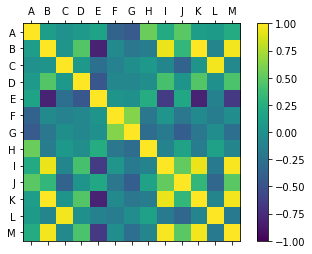

In [9]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)
plt.savefig('corr_matrix.png')
plt.show()

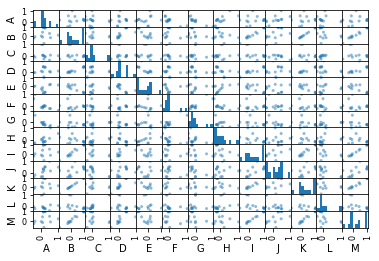

In [15]:
plt.figure(figsize=(500,300))
scatter_matrix(corr)
plt.savefig('corr_scatterplot.png')
plt.show()